# Data representation
MPPData is the main data representation for pixel-level data used by CAMPA.
See also the [overview](../overview.rst#Data-format) for more information about the on-disk file format.

When possible, MPPData lazily loads the source numpy files (using [numpy.memmap](https://numpy.org/doc/stable/reference/generated/numpy.memmap.html#numpy.memmap)). If lazy loading fails, the file will be loaded in memory.

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

from campa.data import MPPData, load_example_data
from campa.utils import init_logging
from campa.constants import campa_config

# init logging with level INFO=20, WARNING=30
init_logging(level=30)
# ensure that example data is downloaded
load_example_data()
# read correct campa_config -- created with setup.ipynb
campa_config.config_fname = "params/campa.ini"
print(campa_config)

2022-10-28 14:30:34.138851: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-28 14:30:36.046764: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-28 14:30:36.375386: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-28 14:30:36.375433: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

Reading config from /home/icb/hannah.spitzer/.config/campa/campa.ini
Path or dataset does not yet exist. Attempting to download...
{'x-amz-id-2': 'AqkA3n/sO+1Ejfeaer94FItO19WBn3cs2y9KxHati6qu6g9ZB9loBb107e1qXaNnO0RVole/TpU=', 'x-amz-request-id': 'BY41AYD1NNFFARF6', 'Date': 'Fri, 28 Oct 2022 12:30:57 GMT', 'x-amz-replication-status': 'COMPLETED', 'Last-Modified': 'Fri, 28 Oct 2022 11:44:27 GMT', 'ETag': '"6300ee9228b5e78480a3a5a540e85730"', 'x-amz-tagging-count': '1', 'x-amz-server-side-encryption': 'AES256', 'Content-Disposition': 'attachment; filename="example_data.zip"', 'x-amz-version-id': 'WbEd4ye51WteRY2_BZaTchKIFVKkAxuw', 'Accept-Ranges': 'bytes', 'Content-Type': 'application/zip', 'Server': 'AmazonS3', 'Content-Length': '126837954'}
attachment; filename="example_data.zip"
Guessed filename: example_data.zip
Downloading... 126837954


123866it [00:02, 44414.79it/s]


Reading config from params/campa.ini
CAMPAConfig (fname: params/campa.ini)
EXPERIMENT_DIR: /home/icb/hannah.spitzer/projects/pelkmans/software_new/notebooks/example_experiments
BASE_DATA_DIR: /home/icb/hannah.spitzer/projects/pelkmans/software_new/notebooks/example_data
CO_OCC_CHUNK_SIZE: 10000000.0
data_config/testdata: /home/icb/hannah.spitzer/projects/pelkmans/software_new/campa/campa/notebooks/params/TestData_constants.py
data_config/exampledata: /home/icb/hannah.spitzer/projects/pelkmans/software_new/notebooks/params/ExampleData_constants.py



## The MPPData class

We can construct the [MPPData][] instance from numpy and csv files (as described in [overview](../overview.rst#Data-format)) 
using [MPPData.from_data_dir][].

Note that the `data_dir` provided to the function should be relative to `base_dir`, which is either provided directly in the function or set to `data_config.DATA_DIR` otherwise.


[MPPData]: ../classes/campa.data.MPPData.rst
[MPPData.from_data_dir]: ../classes/campa.data.MPPData.from_data_dir.rst


In [2]:
mpp_data = MPPData.from_data_dir("184A1_unperturbed/I09", data_config="ExampleData")
print(mpp_data)

MPPData for ExampleData (247872 mpps with shape (1, 1, 35) from 20 objects). Data keys: ['y', 'obj_ids', 'x', 'mpp', 'labels'].


All data is accessible through [MPPData.data][], and there are several convenience attributes for faster access.
Attributes `x` and `y` are spatial coordinates of each data point (pixel), `obj_ids` map pixels to objects (cells), and `mpp` contains the multiplexed pixel profiles, a `#pixels x #channels` vector.

[MPPData.data]: ../classes/campa.data.MPPData.data.rst
[MPPData.from_data_dir]: ../classes/campa.data.MPPData.from_data_dir.rst

In [3]:
print(mpp_data.data("x"))
print(mpp_data.x)
print(mpp_data.y)
print(mpp_data.mpp.shape)

[1448 1452 1453 ... 1768 1769 1770]
[1448 1452 1453 ... 1768 1769 1770]
[ 106  106  106 ... 1832 1832 1832]
(247872, 1, 1, 35)


Note that the shape of the `mpp_data` is `#pixels x 1 x 1 x #channels`.
This is because we can add a [square neighbourbood](#neighborhood-information) around each pixel to the `mpp_data`. 

The centre mpp can be accessed using [MPPData.center_mpp][]:

[MPPData]: ../classes/campa.data.MPPData.rst
[MPPData.center_mpp]: ../classes/campa.data.MPPData.center_mpp.rst

In [4]:
print(mpp_data.center_mpp)

[[142 108 166 ... 110 121 144]
 [147 113 136 ... 109 127 146]
 [157 121 118 ... 105 126 145]
 ...
 [180 111 139 ... 109 123 255]
 [157 105 156 ... 115 128 249]
 [137 102 178 ... 113 140 234]]


Metadata is stored in [MPPData.metadata][] and channel information in [MPPData.channels][]

[MPPData]: ../classes/campa.data.MPPData.rst
[MPPData.metadata]: ../classes/campa.data.MPPData.metadata.rst
[MPPData.channels]: ../classes/campa.data.MPPData.channels.rst

In [5]:
display(mpp_data.metadata)
display(mpp_data.channels)

,mapobject_id,plate_name,well_name,well_pos_y,well_pos_x,tpoint,zplane,label,is_border,mapobject_id_cell,...,perturbation,secondary_only,siRNA,perturbation_duration,LocalDensity_Nuclei_800,TR_factor,TR_norm,TR,TR_factor_DMSO-unperturbed,TR_norm_DMSO-unperturbed
0,324138,plate01,I09,0,2,0,0,3,0,324079,...,normal,False,NaN,normal,0.000116,0.974852,409.119591,419.673544,0.974852,409.119591
1,291041,plate01,I09,0,3,0,0,12,0,290975,...,normal,False,NaN,normal,0.000190,0.974852,432.410658,443.565445,0.974852,432.410658
2,383793,plate01,I09,0,4,0,0,19,0,383757,...,normal,False,NaN,normal,0.000118,0.974852,366.781820,376.243596,0.974852,366.781820
3,383341,plate01,I09,1,3,0,0,49,0,383287,...,normal,False,NaN,normal,0.000149,0.974852,378.254582,388.012319,0.974852,378.254582
4,345908,plate01,I09,1,4,0,0,15,0,345871,...,normal,False,NaN,normal,0.000118,0.974852,308.057232,316.004105,0.974852,308.057232
5,205776,plate01,I09,2,1,0,0,8,0,205742,...,normal,False,NaN,normal,0.000128,0.974852,348.677269,357.672008,0.974852,348.677269
6,205790,plate01,I09,2,1,0,0,22,0,205756,...,normal,False,NaN,normal,0.000149,0.974852,417.591761,428.364268,0.974852,417.591761
7,256546,plate01,I09,2,3,0,0,8,0,256502,...,normal,False,NaN,normal,0.000138,0.974852,236.845799,242.955649,0.974852,236.845799
8,231620,plate01,I09,2,4,0,0,31,0,231520,...,normal,False,NaN,normal,0.000123,0.974852,117.952101,120.994881,0.974852,117.952101
9,359378,plate01,I09,3,1,0,0,19,0,359333,...,normal,False,NaN,normal,0.000145,0.974852,358.652196,367.904255,0.974852,358.652196


,name
channel_id,
0,00_EU
1,01_CDK9_pT186
2,01_PABPC1
3,02_CDK7
4,03_CDK9
5,03_RPS6
6,05_GTF2B
7,05_Sm
8,07_POLR2A


## Export and saving

### Save mpp data
The MPPData object can be stored on dist using [MPPData.write][]

### Export as csv
Using [MPPData.extract_csv][], we can extract MPPData into a pandas dataframe.

[MPPData]: ../classes/campa.data.MPPData.rst
[MPPData.extract_csv]: ../classes/campa.data.MPPData.extract_csv.rst
[MPPData.write]: ../classes/campa.data.MPPData.write.rst

In [6]:
mpp_data.extract_csv(data="mpp", obs=["well_name"])

name,00_EU,01_CDK9_pT186,01_PABPC1,02_CDK7,03_CDK9,03_RPS6,05_GTF2B,05_Sm,07_POLR2A,07_SETD1A,...,20_ALYREF,20_SP100,21_COIL,21_NCL,00_DAPI,07_H2B,x,y,well_name,mapobject_id
0,142,108,166,174,106,121,115,113,114,111,...,134,104,110,110,121,144,1448,106,I09,324138
1,147,113,136,153,115,125,109,125,110,109,...,127,110,111,109,127,146,1452,106,I09,324138
2,157,121,118,139,116,114,120,123,116,106,...,128,106,104,105,126,145,1453,106,I09,324138
3,161,113,128,124,116,119,115,118,113,109,...,128,111,111,108,132,138,1454,106,I09,324138
4,158,108,127,114,114,133,113,122,116,112,...,137,108,106,117,131,161,1465,106,I09,324138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247867,209,112,157,121,106,147,152,108,118,114,...,184,106,111,115,125,255,1766,1832,I09,248104
247868,161,113,158,126,111,137,122,132,116,115,...,190,102,113,114,120,239,1767,1832,I09,248104
247869,180,111,139,128,103,135,109,123,135,108,...,173,105,108,109,123,255,1768,1832,I09,248104
247870,157,105,156,121,104,156,117,125,135,113,...,167,109,117,115,128,249,1769,1832,I09,248104




### Convert to adata
One can convert the MPPData to an AnnData object. This can be advantageous, as one can on utilise all scanpy functions for further analysis.

Let's create an adata object for one cell. For that, we first need to subset `mpp_data` to one cell,
and then use [MPPData.get_adata][] to create the AnnData object.

In [7]:
# subset to one cell
mpp_data_sub = mpp_data.subset(obj_ids=mpp_data.unique_obj_ids[:1], copy=True)

# get adata object from information in MPPData
adata = mpp_data_sub.get_adata()
print(adata)

AnnData object with n_obs × n_vars = 12494 × 35
    obs: 'mapobject_id', 'plate_name', 'well_name', 'well_pos_y', 'well_pos_x', 'tpoint', 'zplane', 'label', 'is_border', 'mapobject_id_cell', 'plate_name_cell', 'well_name_cell', 'well_pos_y_cell', 'well_pos_x_cell', 'tpoint_cell', 'zplane_cell', 'label_cell', 'is_border_cell', 'is_mitotic', 'is_mitotic_labels', 'is_polynuclei_HeLa', 'is_polynuclei_HeLa_labels', 'is_polynuclei_184A1', 'is_polynuclei_184A1_labels', 'is_SBF2_Sphase_labels', 'is_SBF2_Sphase', 'Heatmap-48', 'cell_cycle', 'description', 'dimensions', 'id', 'cell_type', 'EU', 'duration', 'perturbation', 'secondary_only', 'siRNA', 'perturbation_duration', 'LocalDensity_Nuclei_800', 'TR_factor', 'TR_norm', 'TR', 'TR_factor_DMSO-unperturbed', 'TR_norm_DMSO-unperturbed'
    var: 'name'
    obsm: 'spatial'


The resulting adata object contains pixels as obs and channels as var. It also contains all mpp_data.metadata columns.

We can now use all scanpy functions on this object, e.g. spatial plotting:

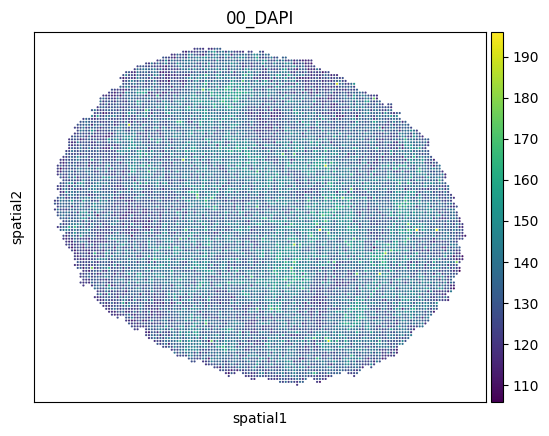

In [8]:
import scanpy as sc

sc.pl.embedding(adata, basis="spatial", color=["00_DAPI"])

## Visualisation

We can visualise several channels of the data of either part of the data or of individual objects (e.g. cells).
First, let us plot all object contained in `MPPData` with their spatial coordinates `x` and `y` using [MPPData.get_img][].

If you could like to get an image with specific channels, you can specify the `channel_ids`. The [MPPData.get_channel_ids][] helps to map channel names to ids.

[MPPData]: ../classes/campa.data.MPPData.rst
[MPPData.get_img]: ../classes/campa.data.MPPData.get_img.rst
[MPPData.get_channel_ids]: ../classes/campa.data.MPPData.get_channel_ids.rst

[12, 16, 32]


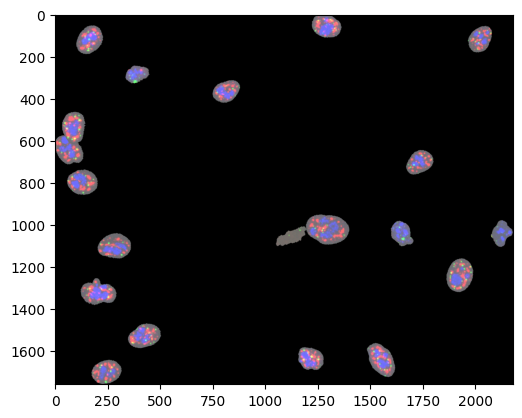

In [9]:
channel_ids = mpp_data.get_channel_ids(["09_SRRM2", "11_PML", "21_NCL"])
print(channel_ids)

img, (offset_x, offset_y) = mpp_data.get_img(
    channel_ids=channel_ids,
)
_ = plt.imshow(img)

This function returns the reconstructed image and offset information that needs to be subtracted from `x` and `y` before being able to use them to index the image. 

Note that the offset information is only returned when the `img_size` argument to [MPPData.get_img][] is not defined.

[MPPData.get_img]: ../classes/campa.data.MPPData.get_img.rst

In [10]:
print(offset_x, offset_y)

print("Location of first data point in img:", mpp_data.x[0] - offset_x, mpp_data.y[0] - offset_y)
print("Value of img at that location:", img[mpp_data.y[0] - offset_y, mpp_data.x[0] - offset_x])
print("Value of fist data point in mpp for channel_ids:", mpp_data.center_mpp[0, channel_ids])

182 106
Location of first data point in img: 1266 0
Value of img at that location: [104 107 110]
Value of fist data point in mpp for channel_ids: [104 107 110]


Now let's plot a separate object (cell). For that, [MPPData.get_object_img][] is used.

[MPPData.get_object_img]: ../classes/campa.data.MPPData.get_object_img.rst

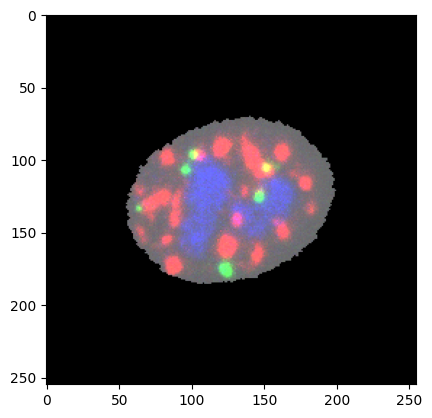

In [11]:
img = mpp_data.get_object_img(mpp_data.unique_obj_ids[0], channel_ids=channel_ids, img_size=255)
plt.imshow(img)

We can also plot all channels of this cell:

(255, 255, 35)


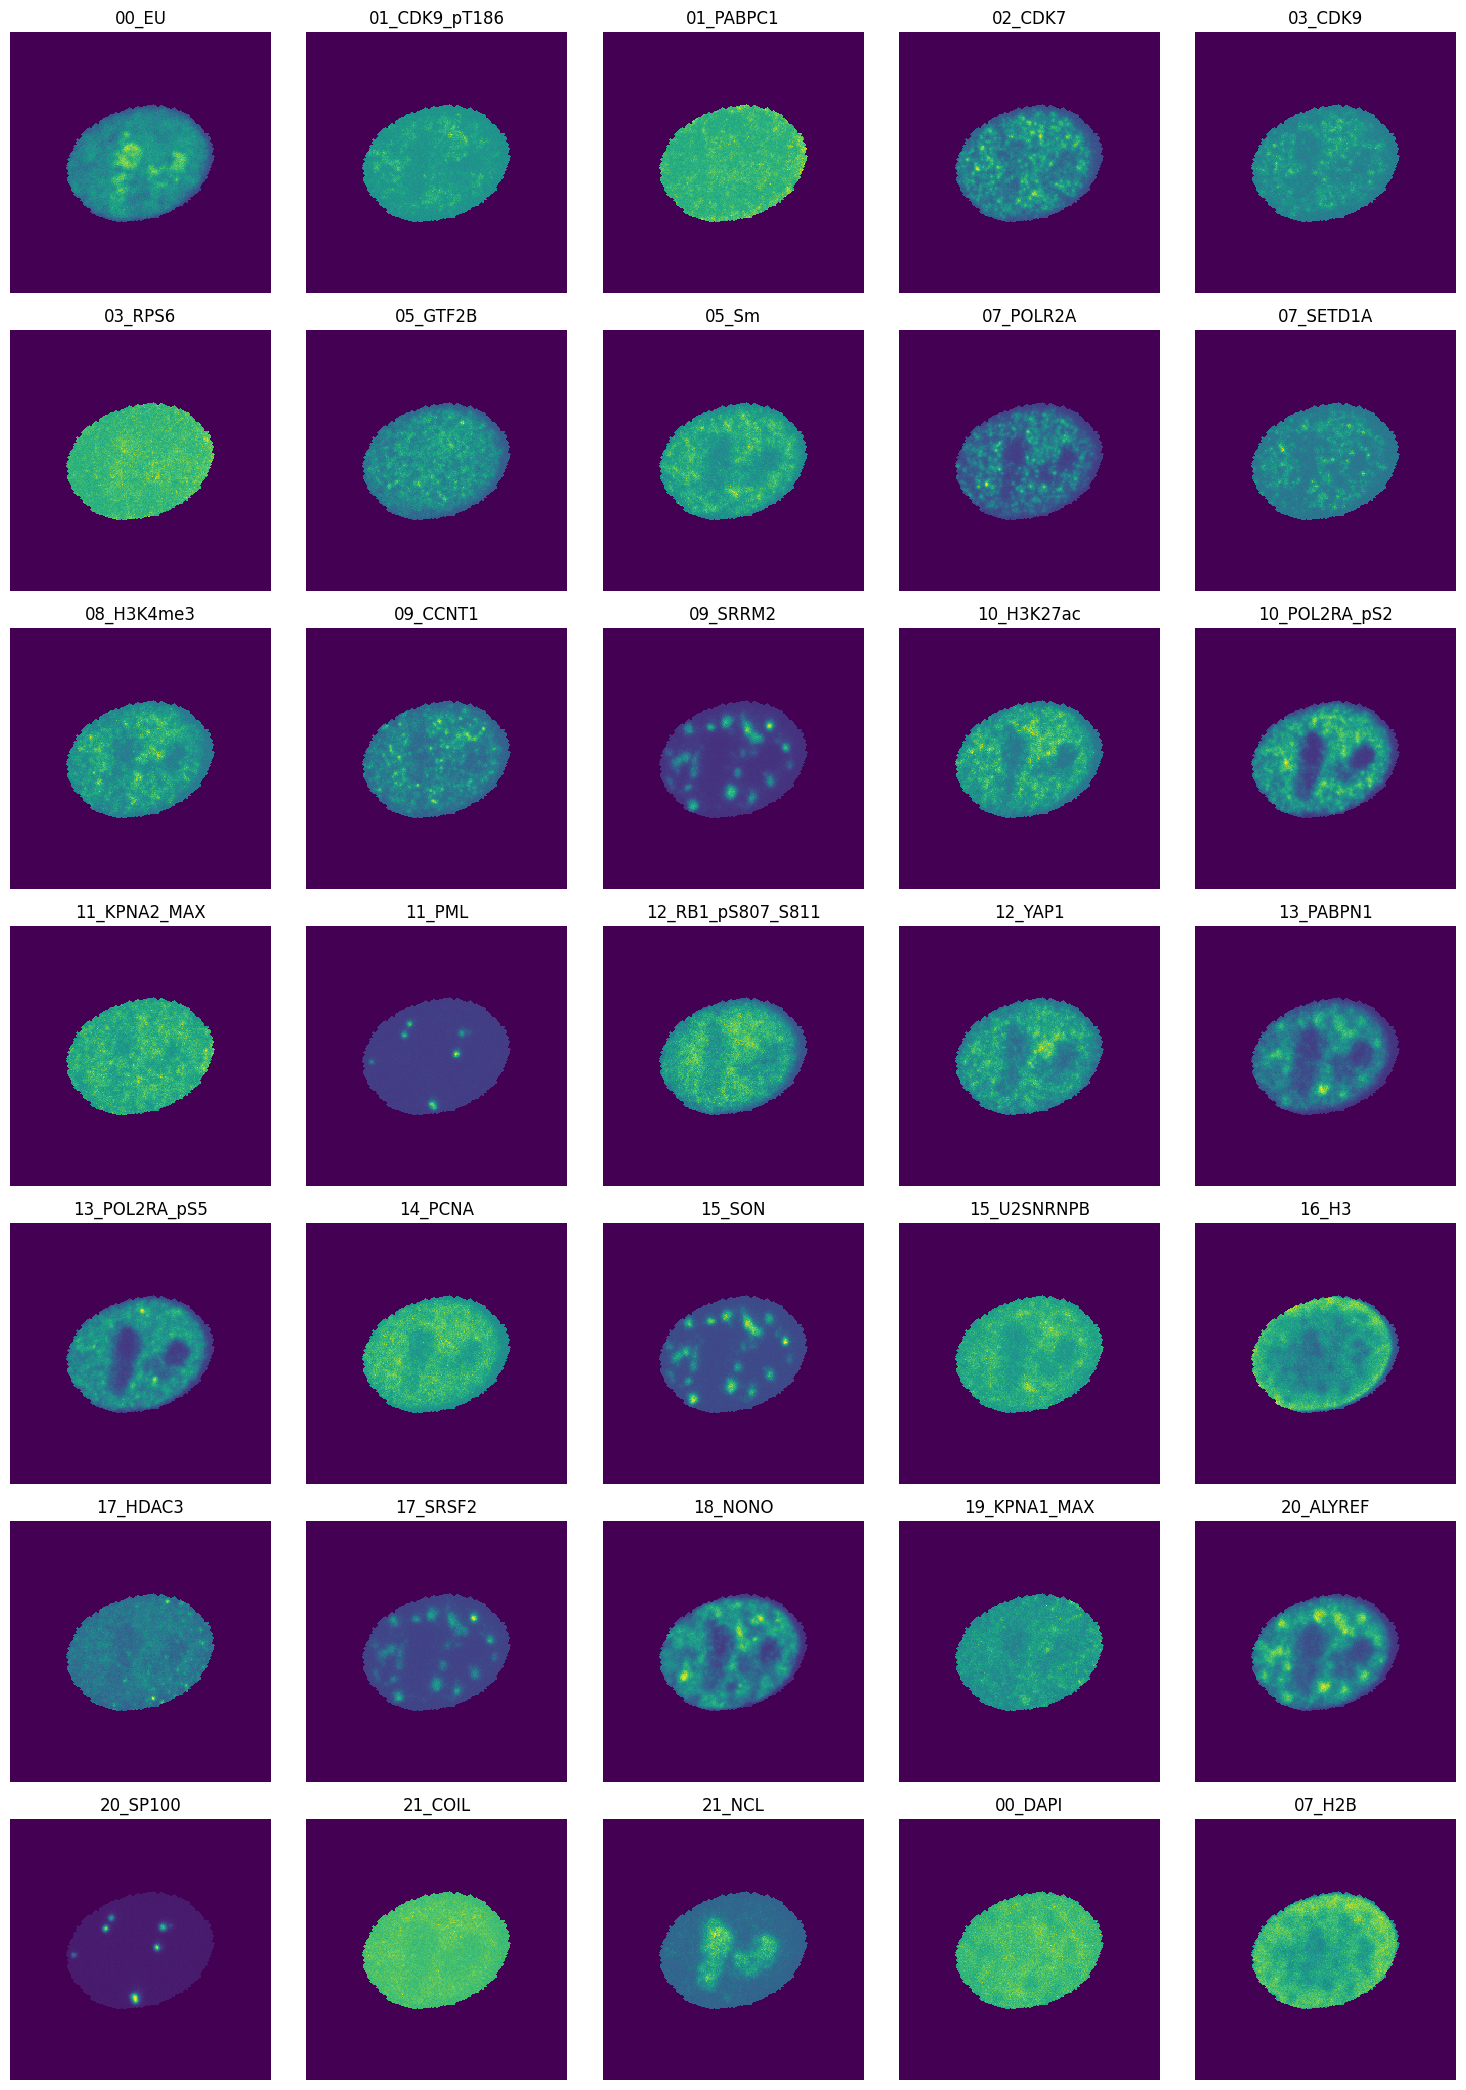

In [12]:
img = mpp_data.get_object_img(mpp_data.unique_obj_ids[0], img_size=255)
print(img.shape)
num_cols = 5
num_channels = len(mpp_data.channels)
num_rows = num_channels // num_cols

fig, axes = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(int(3 * num_cols), int(3 * num_rows)))
i = 0
for row in range(num_rows):
    for col in range(num_cols):
        if i >= num_channels:
            break
        axes[row][col].imshow(img[:, :, i], interpolation="none")
        axes[row][col].set_title(mpp_data.channels.iloc[i]["name"])
        axes[row][col].axis("off")
        i += 1
plt.tight_layout()
plt.show()

One can also get a list of images for all objects in `MPPData` using [MPPData.get_object_imgs][].
Let's get images for all available cells and plot first six:

[MPPData.get_object_imgs]: ../classes/campa.data.MPPData.get_object_imgs.rst

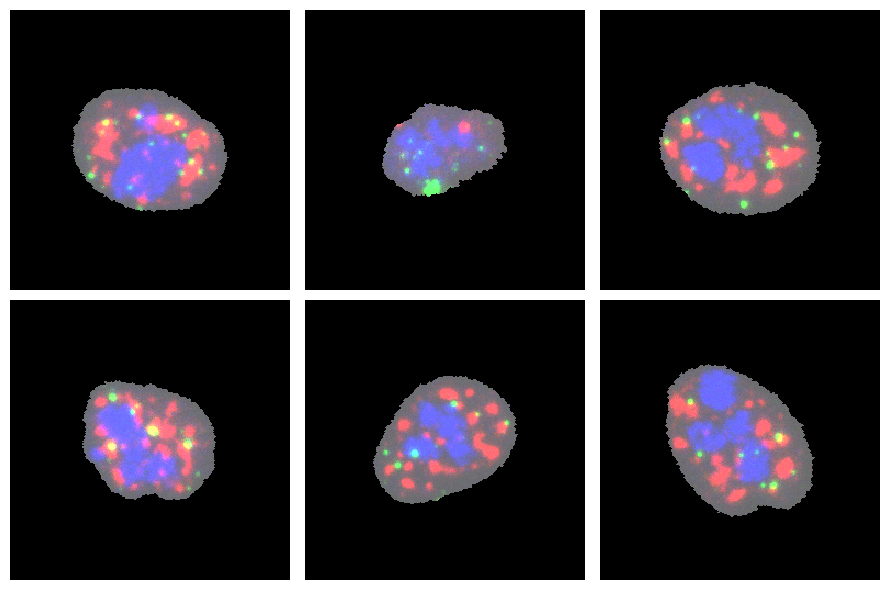

In [13]:
img = mpp_data.get_object_imgs(channel_ids=channel_ids, img_size=255)
num_rows, num_cols = 2, 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(int(3 * num_cols), (int(3 * num_rows))))
i = 0
for row in range(num_rows):
    for col in range(num_cols):
        axes[row][col].imshow(img[i], interpolation="none")
        axes[row][col].axis("off")
        i += 1
plt.tight_layout()
plt.show()
plt.close()

## Filter and subset data
There are several functions that allow the modification of mpp_data objects
### By channels
We can subset `mpp_data` selected channels. Note that this operation is performed in-place and will update fields `mpp_data.mpp` and `mpp_data.channels`.

In [14]:
# subset channels
channels = [
    "01_CDK9_pT186",
    "01_PABPC1",
    "02_CDK7",
    "03_CDK9",
    "03_RPS6",
    "00_DAPI",
    "07_H2B",
]

mpp_data.subset_channels(channels)

print(mpp_data.mpp.shape)
display(mpp_data.channels)

(247872, 1, 1, 7)


,name
channel_id,
0,01_CDK9_pT186
1,01_PABPC1
2,02_CDK7
3,03_CDK9
4,03_RPS6
5,00_DAPI
6,07_H2B


### By objects (cells)

To filter mpp_data based on specific *objects* (cells), we use the [MPPData.subset][] function.
Several filters for sub-setting can be defined:

- subset to random fraction / number of objects
- filtering by object ids
- filtering by values in [MPPData.metadata][]
- filtering by condition values

#### Subset to random fraction / number of objects
Using attributes `frac` and `num`, we can subset the MPPData to a random selection of objects.

[MPPData]: ../classes/campa.data.MPPData.rst
[MPPData.subset]: ../classes/campa.data.MPPData.subset.rst
[MPPData.metadata]: ../classes/campa.data.MPPData.metadata.rst

In [15]:
# Subset fraction of objects:
mpp_data_sub = mpp_data.subset(frac=0.05, copy=True)
print(f"Subset fraction: {len(mpp_data_sub.unique_obj_ids)/len(mpp_data.unique_obj_ids)}")

# Subset specific number of objects:
mpp_data_sub = mpp_data.subset(num=10, copy=True)
print(f"Subset fraction: {len(mpp_data_sub.unique_obj_ids)/len(mpp_data.unique_obj_ids)}")

Subset fraction: 0.05
Subset fraction: 0.5


#### filtering by object ids
Use `obj_ids` to select specific objects.

In [16]:
# subset to one cell
mpp_data_sub = mpp_data.subset(obj_ids=mpp_data.unique_obj_ids[:1], copy=True)
print(mpp_data.unique_obj_ids)
print(mpp_data_sub.unique_obj_ids)

[200792 205776 205790 231620 248082 248102 248104 256546 259784 291041
 324138 331833 345908 359378 359391 359393 366486 366493 383341 383793]
[200792]


#### filtering by values in MPPData.metadata

[MPPData.metadata][] contains object-level metadata like e.g. cell cycle state or perturbation status. 
We can use this information to subset the MPPData.

For that, we need to specify the name of the column in the metadata table and
a set of allowed entries for that column.
A special entry `NO_NAN` is a special token selecting all values except NaN values.

We can also provide several columns together with their entries,
separated by a comma, and the resulting MPPData object will be computed as a combination of all provided conditions.

[MPPData]: ../classes/campa.data.MPPData.rst
[MPPData.subset]: ../classes/campa.data.MPPData.subset.rst
[MPPData.metadata]: ../classes/campa.data.MPPData.metadata.rst

In [17]:
# filter by NO_NAN cellcycle stage
# perform operation inplace
print(
    "Cell cycle entries before subsetting by NO_NAN values:",
    (mpp_data.metadata.cell_cycle).unique(),
)
mpp_data.subset(cell_cycle="NO_NAN")
print(
    "Cell cycle entries after subsetting to NO_NAN values:",
    np.unique(mpp_data.metadata.cell_cycle),
)

Cell cycle entries before subsetting by NO_NAN values: [nan 'G1' 'G2' 'S']
Cell cycle entries after subsetting to NO_NAN values: ['G1' 'G2' 'S']


### By pixels

We can also subset the MPPData by selecting random *pixels*. 
For this, the function [MPPData.subsample][] can be used.
This is an important step when selecting training data for the cVAE, as we would like to choose samples from all cells, but not necessarily the whole cell 
(to keep the size of the training data manageable).

[MPPData]: ../classes/campa.data.MPPData.rst
[MPPData.subsample]: ../classes/campa.data.MPPData.subsample.rst

In [18]:
mpp_data_sub = mpp_data.subsample(frac_per_obj=0.05)

print(f"Subset fraction: {mpp_data_sub.mpp.shape[0]/mpp_data.mpp.shape[0]}")

Subset fraction: 0.04996453416108649


## Normalisation
To prepare the data, pixel values can be normalised. 
For that, pixel values can be e.g. shifted and re-scaled so that they end up ranging between 0 and 1.
For this, we can use [MPPData.normalise][].
This can do the following:

- background normalisation: shift all values by a fixed background value / one background value per channel.
- percentile normalisation
 
Note that the argument `rescale_values` can be modified as a side-effect by this function. If an empty list is passed as `rescale_values`, it will be filled with the percentiles calculated on this data.
If `rescale_values` contains previously calculated percentiles, they will be used to re-scale the data, instead of calculating percentiles.

To demonstrate this, let us split the MPPData in two, and first calculate the percentile on the first half.

[MPPData]: ../classes/campa.data.MPPData.rst
[MPPData.normalise]: ../classes/campa.data.MPPData.normalise.rst

In [19]:
mpp_data1 = mpp_data.subset(obj_ids=mpp_data.unique_obj_ids[:6], copy=True)
mpp_data2 = mpp_data.subset(obj_ids=mpp_data.unique_obj_ids[6:], copy=True)

rescale_values = []
mpp_data1.normalise(percentile=95, rescale_values=rescale_values)
print("Rescale values for mpp_data1:", rescale_values)

Rescale values for mpp_data1: [144.0, 166.0, 319.0, 181.0, 151.0, 167.0, 361.0]


Now, let us use the `rescale_values` to scale `mpp_data2`:

In [20]:
mpp_data2.normalise(percentile=95, rescale_values=rescale_values)

print("Median in mpp_data1:", np.median(mpp_data1.center_mpp, axis=0))
print("Median in mpp_data2:", np.median(mpp_data2.center_mpp, axis=0))

Median in mpp_data1: [0.8125     0.76506025 0.63009405 0.7016575  0.8476821  0.83233535
 0.72853184]
Median in mpp_data2: [0.8055556  0.7409639  0.6238245  0.70718235 0.8344371  0.83832335
 0.8504155 ]


## Prepare for VAE training

In order to prepare data for VAE training, MPPData contains several functions for 
- adding neighbourhood information
- addition conditions
- splitting data in train/val/test

See also the [Dataset for training models tutorial](nn_dataset.ipynb).

### Neighbourhood information

For the CAMPA workflow, it is advantageous to add a small local neighbourhood to each pixel. 
This results in a more stable latent space.
To add neighbourhood information, use the [MPPData.add_neighborhood][] function.
Note that this only works before we do any random subsampling of pixels.

It is also possible to do subsampling and add neighbourhood information at the same time using the `add_neighborhood` argument of the [MPPData.subsample][] function. This is more time-efficient, as the neighbours only need to be computed for every subsampled pixel. 

[MPPData.add_neighborhood]: ../classes/campa.data.MPPData.add_neighborhood.rst
[MPPData.subsample]: ../classes/campa.data.MPPData.subsample.rst

In [21]:
mpp_data_neighb = mpp_data.add_neighborhood(size=3, copy=True)

print(f"MPP dataset before adding the neighbourhood, has neighbour data: {mpp_data.has_neighbor_data}")
print(f"Representation of one MPP before adding the neighbourhood (first channel):\n {mpp_data.mpp[0,:, :, 0]}")

print(f"MPP dataset after adding the neighbourhood, has neighbor data: {mpp_data_neighb.has_neighbor_data}")
print(f"Representation of one mpp after adding the neighbourhood (first channel):\n {mpp_data_neighb.mpp[0, :, :, 0]}")

MPP dataset before adding the neighbourhood, has neighbour data: False
Representation of one MPP before adding the neighbourhood (first channel):
 [[117]]
MPP dataset after adding the neighbourhood, has neighbor data: True
Representation of one mpp after adding the neighbourhood (first channel):
 [[117 117 117]
 [117 117 117]
 [111 116 123]]


In [22]:
# subsample and add neighbourhood

mpp_data_sub = mpp_data.subsample(frac_per_obj=0.05, add_neighborhood=True, neighborhood_size=3)

print(f"Subset fraction: {mpp_data_sub.mpp.shape[0]/mpp_data.mpp.shape[0]}")

print(f"MPP representation before adding the neighbourhood (first channel)\n: {mpp_data.mpp[0,:, :, 0]}")
print(f"MPP representation after adding the neighbourhood (first channel)\n: {mpp_data_sub.mpp[0, :, :, 0]}")

Subset fraction: 0.04996453416108649
MPP representation before adding the neighbourhood (first channel)
: [[117]]
MPP representation after adding the neighbourhood (first channel)
: [[114 126 109]
 [121 124 122]
 [125 127 119]]


Note that since a random subsampling was performed, the first value in the `mpp_data` does not necessarily
correspond to the first element in `mpp_data_sub`.

### Add conditions to MPPData

The CAMPA framework allows you to learn a condition-independent latent representation of input pixel profiles.
For this, we are training a conditional VAE. 
Here, we are going to prepare the MPPData for this by adding a special condition vector, [MPPData.conditions][] to the object.
This could represent e.g. perturbation or cell cycle.

[MPPData.add_conditions][] prepares and adds this condition vector, utilising cell-level information from the [MPPData.metadata][] table.
Before categorical conditions can be added, they need to be described on `data_config.CONDITIONS`, to enable a mapping from categorical values to numbers.

``cond_desc`` describes the conditions that should be added.
It is a list of condition descriptions. 
Each condition is calculated separately and concatenated to form the resulting [MPPData.conditions][] vector.
Condition descriptions have the following format: `"{condition}(_{postprocess})"`.

Condition values are obtained as follows:

1. look up condition in [MPPData.metadata][]. 
    If `condition` is described in `data_config.CONDITIONS`, map it to numerical values. 
    Note that if there is an entry `UNKNOWN` in `data_config.CONDITIONS`, all unmapped values will be mapped to this class. 
    If `condition` is not described in `data_config.CONDITIONS`, values are assumed to be continuous 
    and stored as they are in the condition vector.
2. post-process conditions. `postprocess` can be one of the following values:

    - `lowhigh_bin_2`: Only for continuous values. Removes middle values. Bin all values in 4 quantiles, encodes values in
        the lowest quantile as one class and values in the high quantile as the second class (one-hot encoded), 
        and set all values in between set to NaN.
    - `bin_3`: Only for continuous values. Bin values in .33 and .66 quantiles and one-hot encode each value.
    - `zscore`: Only for continuous values. Normalise values by mean and std.
    - `one_hot`: Only for categorical values. One-hot encode values. 

For categorical descriptions, it is possible to pass a list of condition descriptions. 
This will return a unique one-hot encoded vector combining multiple conditions.

We can also provide a `cond_params` dict to the function, to enable the use of precomputed quantiles or mean/std values. If no values are provided in `cond_params`, the computed quantiles or mean/std values are added to `cond_params`, allowing us to use these values to process other MPPData objects.

In the following, let us look at some examples how to add conditions.

[MPPData.add_conditions]: ../classes/campa.data.MPPData.add_conditions.rst
[MPPData.conditions]: ../classes/campa.data.MPPData.conditions.rst
[MPPData.metadata]: ../classes/campa.data.MPPData.metadata.rst

#### Continuous conditions
Let us use the transcription rate condition `TR` for this example. 
Remember, that every condition we are adding needs to be present in the [MPPData.metadata][] table.

For this dataset, we computed the transcription rate as mean EU molecular intensity per cell over a period of 30 minutes. 
This gives an estimate of the amount of new RNA transcripts.

Let us again split the MPPData and first add conditions on this first half

[MPPData.add_conditions]: ../classes/campa.data.MPPData.add_conditions.rst
[MPPData.conditions]: ../classes/campa.data.MPPData.conditions.rst
[MPPData.metadata]: ../classes/campa.data.MPPData.metadata.rst

In [23]:
mpp_data1 = mpp_data.subset(obj_ids=mpp_data.unique_obj_ids[:6], copy=True)
mpp_data2 = mpp_data.subset(obj_ids=mpp_data.unique_obj_ids[6:], copy=True)

cond_params = {}
mpp_data1.add_conditions(["TR_norm_lowhigh_bin_2"], cond_params=cond_params)

print("cond_params for mpp_data1:", cond_params)

cond_params for mpp_data1: {'TR_norm_lowhigh_bin_2_quantile': [339.39541649462217, 417.5917605897343]}


This adds a `#pixels x 2` conditions vector to `mpp_data1`. The two conditions are low quantile TR cells, and high quantile TR cells. 
All cells that have a TR between the low and high quantiles have NaN values.

As conditions are the same for all pixels in the same cell, we can get an overview over the assigned conditions looking at one value per object id:

In [24]:
for obj_id, i in zip(*np.unique(mpp_data1.obj_ids, return_index=True)):
    # get TR for comparison
    TR = float(mpp_data1.metadata[mpp_data1.metadata["mapobject_id"] == obj_id]["TR"])
    # print condition and TR for this cell
    print("obj_id:", obj_id, "condition:", mpp_data1.conditions[i], "TR:", TR)

obj_id: 205776 condition: [nan nan] TR: 357.67200760901375
obj_id: 205790 condition: [1. 0.] TR: 428.3642683585313
obj_id: 248082 condition: [1. 0.] TR: 250.4885806253832
obj_id: 248102 condition: [0. 1.] TR: 515.7354206855616
obj_id: 259784 condition: [1. 0.] TR: 348.1507131885012
obj_id: 291041 condition: [0. 1.] TR: 443.565445026178


We can now use `cond_params` to use the same quantiles when adding conditions to `mpp_data2`.

In [25]:
mpp_data2.add_conditions(["TR_norm_lowhigh_bin_2"], cond_params=cond_params)

# show resulting conditions
for obj_id, i in zip(*np.unique(mpp_data2.obj_ids, return_index=True)):
    # get TR for comparison
    TR = float(mpp_data2.metadata[mpp_data2.metadata["mapobject_id"] == obj_id]["TR"])
    # print condition and TR for this cell
    print("obj_id:", obj_id, "condition:", mpp_data2.conditions[i], "TR:", TR)

obj_id: 345908 condition: [1. 0.] TR: 316.0041054648299
obj_id: 359378 condition: [nan nan] TR: 367.90425531914894
obj_id: 359393 condition: [0. 1.] TR: 513.66859045505
obj_id: 366493 condition: [1. 0.] TR: 330.84783201527136
obj_id: 383341 condition: [nan nan] TR: 388.0123185637892
obj_id: 383793 condition: [nan nan] TR: 376.2435963681996


#### Categorical conditions

Categorical conditions are e.g. perturbation or cell cycle. 
They need to be defined in `data_config.CONDITIONS` to enable mapping from string values to classes.

Lets check which conditions are defined for this example:
Remember that you can add conditions by editing the `data_config` file. 

In [26]:
print("data_config:", mpp_data.data_config_name)
print("data_config fname:", campa_config.data_configs[mpp_data.data_config_name.lower()])
print(mpp_data.data_config.CONDITIONS)

data_config: ExampleData
data_config fname: /home/icb/hannah.spitzer/projects/pelkmans/software_new/notebooks/params/ExampleData_constants.py
{'perturbation_duration': ['AZD4573-120', 'AZD4573-30', 'CX5461-120', 'DMSO-120', 'DMSO-720', 'Meayamycin-720', 'TSA-30', 'Triptolide-120', 'Wnt-C59-720', 'normal'], 'cell_cycle': ['M', 'G1', 'S', 'G2'], 'well_name': ['H06', 'H07', 'I03', 'I08', 'I09', 'I10', 'I11', 'I12', 'I13', 'I14', 'I16', 'I17', 'I18', 'I20', 'J06', 'J07', 'J08', 'J09', 'J10', 'J12', 'J13', 'J14', 'J15', 'J16', 'J18', 'J20', 'J21', 'J22'], 'siRNA': ['scrambled', 'SBF2']}


Lets use the `cell_cycle` condition first.
Using just `cell_cycle` as condition will add values between 0-3 (1-3 for this example, as there are no M-stage cells in this data).

In [27]:
mpp_data.add_conditions(["cell_cycle"])

print(mpp_data.conditions.shape)
print(np.unique(mpp_data.conditions))

(153669, 1)
[1 2 3]


Using `cell_cycle_one_hot` will one-hot encode the cell-cycle stage:

In [28]:
mpp_data.add_conditions(["cell_cycle_one_hot"])

print(mpp_data.conditions.shape)
print(mpp_data.conditions)

(153669, 4)
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


#### Combine multiple categorical conditions
We can also combine multiple categorical conditions into one one-hot encoded vector. Here, let us combine cell-cycle and perturbation-duration into one conditions. There are 4 cell-cycle values and 10 perturbation values. This means that there are $4*10=40$ unique cell-cycle-perturbation combinations, which will result in a `#pixels x 40` conditions vector.

In [29]:
mpp_data.add_conditions([["cell_cycle_one_hot", "perturbation_duration_one_hot"]])
print(mpp_data.conditions.shape)
print(mpp_data.conditions)

(153669, 40)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


#### Combine multiple conditions (concatenation)
Add more condition descriptions to the `cond_desc` list to combine multiple conditions. 
Here, we combine the TR value with the one-hot encoded cell-cycle.

The first value is the TR, and the following 4 encode the cell cycle stage.

In [30]:
mpp_data.add_conditions(["TR", "cell_cycle_one_hot"])
print(mpp_data.conditions.shape)
print(mpp_data.conditions)

(153669, 5)
[[443.56544503   0.           1.           0.           0.        ]
 [443.56544503   0.           1.           0.           0.        ]
 [443.56544503   0.           1.           0.           0.        ]
 ...
 [515.73542069   0.           0.           1.           0.        ]
 [515.73542069   0.           0.           1.           0.        ]
 [515.73542069   0.           0.           1.           0.        ]]


### Train-val-test split

We can use [MPPData.train_val_test_split][] to split the data into train/val/test sets.

[MPPData.train_val_test_split]: ../classes/campa.data.MPPData.train_val_test_split.rst

In [31]:
train, val, test = mpp_data.train_val_test_split(train_frac=0.8, val_frac=0.1)

print("Train", train)
print("Val", val)
print("Test", test)

Train MPPData for ExampleData (102400 mpps with shape (1, 1, 7) from 9 objects). Data keys: ['y', 'obj_ids', 'x', 'mpp', 'labels', 'conditions'].
Val MPPData for ExampleData (13668 mpps with shape (1, 1, 7) from 1 objects). Data keys: ['y', 'obj_ids', 'x', 'mpp', 'labels', 'conditions'].
Test MPPData for ExampleData (37601 mpps with shape (1, 1, 7) from 2 objects). Data keys: ['y', 'obj_ids', 'x', 'mpp', 'labels', 'conditions'].
